# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

Part 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/MyDrive/DS 3001/college_completion.csv'
df = pd.read_csv(file_path)



Mounted at /content/drive


Part 2

In [2]:
print("Dimensions of the data:", df.shape)

print("Number of observations:", df.shape[0])

print("Variables included:", df.columns.tolist())

print(df.head())


Dimensions of the data: (3798, 63)
Number of observations: 3798
Variables included: ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after

Part 3

In [3]:

cross_tab = pd.crosstab(df['control'], df['level'])
print(cross_tab)



level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632

Description of patterns:
The crosstabulation shows the frequency of different institution types (control) within each level (4-year or 2-year).  We see that most 4-year institutions are public or private non-profit, while there are a significant number of private for-profit 2-year institutions.


It seems like the majority of private schools, especially private not-for-profit are 4-year. On the other hand, the public institutions are primarily 2-year.

Part 4

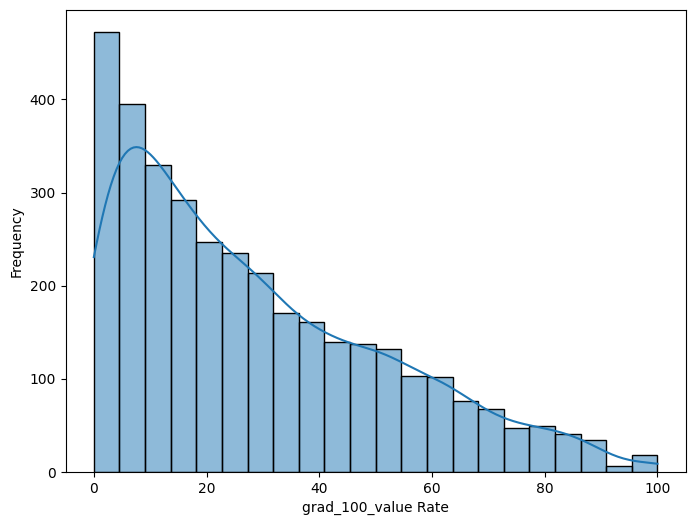

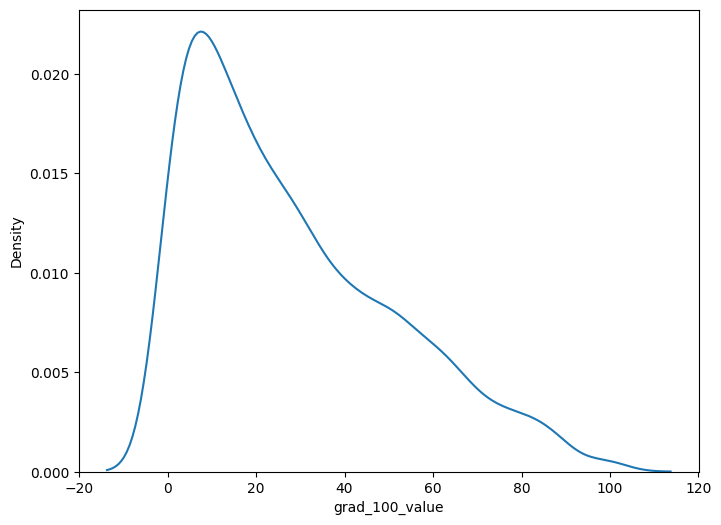

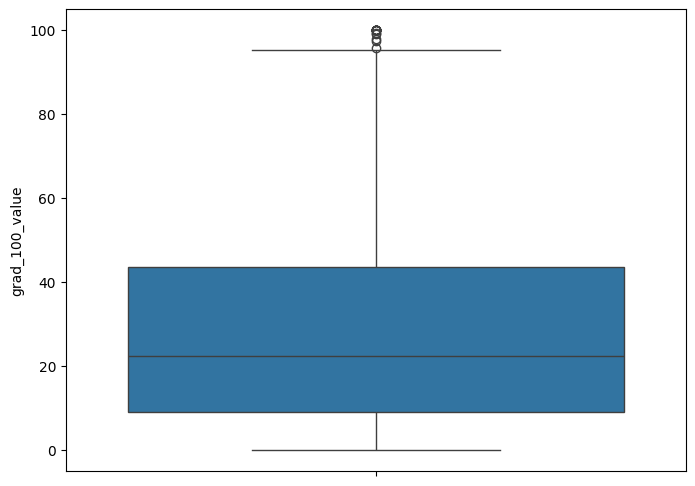

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['grad_100_value'], kde=True)
plt.xlabel('grad_100_value Rate')
plt.ylabel('Frequency')
plt.show()

# Kernel Density Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(df['grad_100_value'])
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['grad_100_value'])
plt.ylabel('grad_100_value')
plt.show()

# Statistical Description
print(df['grad_100_value'].describe())


Part 5

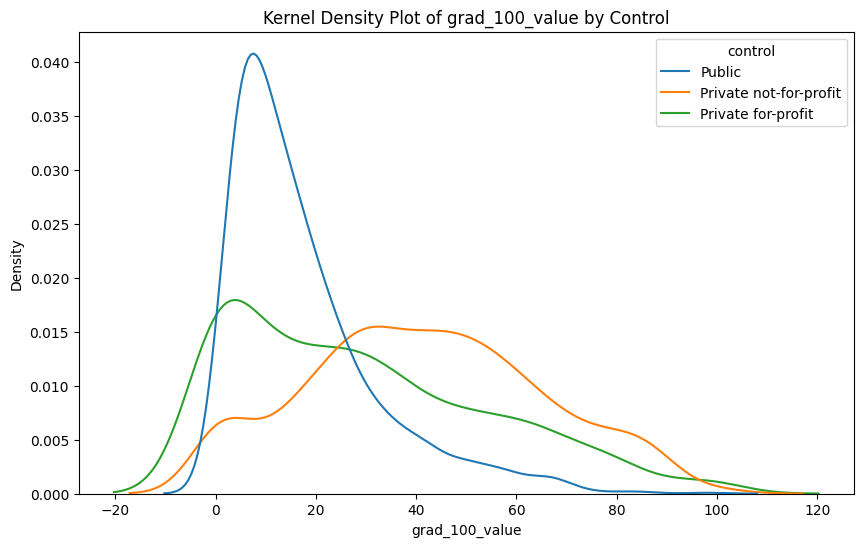

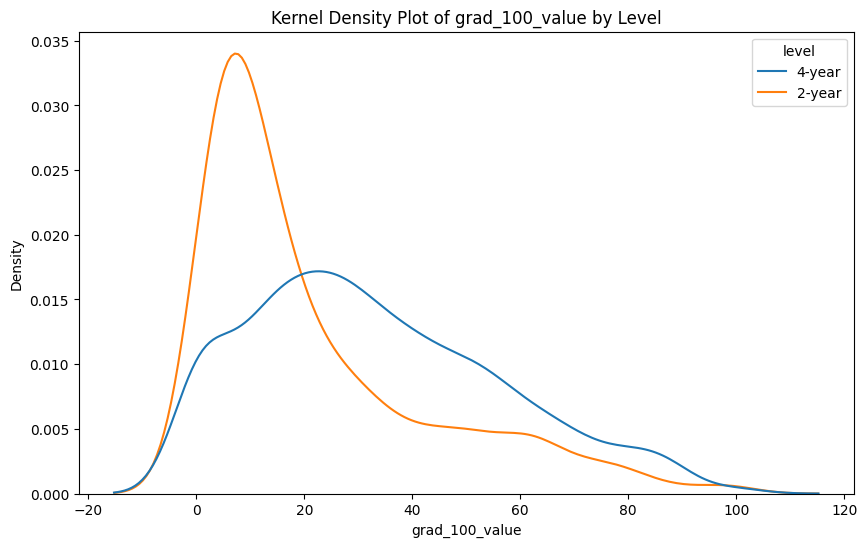

count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public                  21.8  33.800   86.3

In [6]:
# Grouped Kernel Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='control', common_norm=False)
plt.title('Kernel Density Plot of grad_100_value by Control')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='level', common_norm=False)
plt.title('Kernel Density Plot of grad_100_value by Level')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()

# Grouped Statistical Descriptions
grouped_stats = df.groupby(['level', 'control'])['grad_100_value'].describe()
grouped_stats



It appears that 2-year public institutions far and away have the lowest graduation rate. While private not-for-profit 2 year institutions have the highest.

Part 6

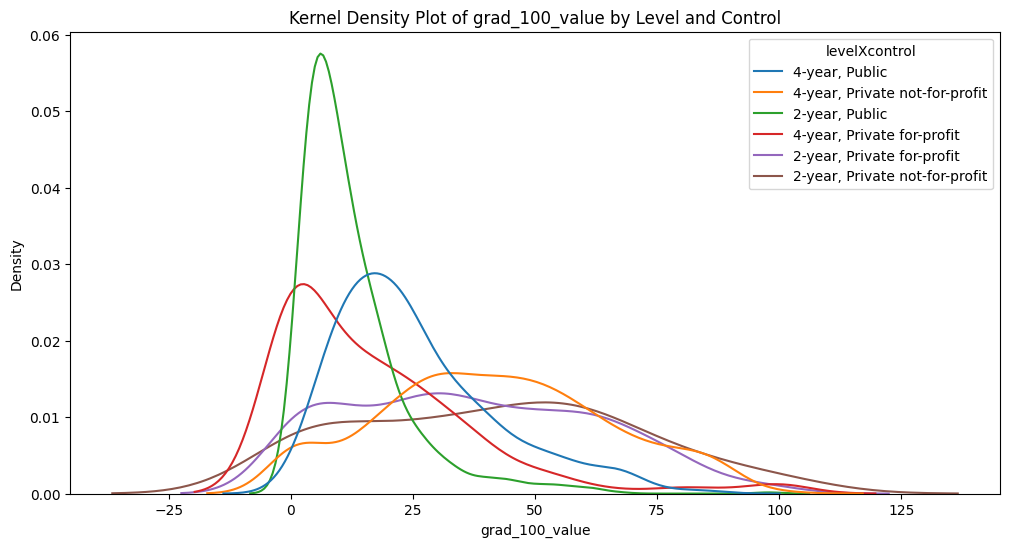

In [7]:

df['levelXcontrol'] = df['level'] + ', ' + df['control']

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', common_norm=False)
plt.title('Kernel Density Plot of grad_100_value by Level and Control')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()

#The grouped kernel density plot by the interaction of level and control shows a similar pattern as the previous plots.
#2-year public institutions still have the lowest graduation rates, and private not-for-profit 2 year institutions have the highest.


2-year, Private not-for-profit appear to have the highest graduation rates.

Part 7

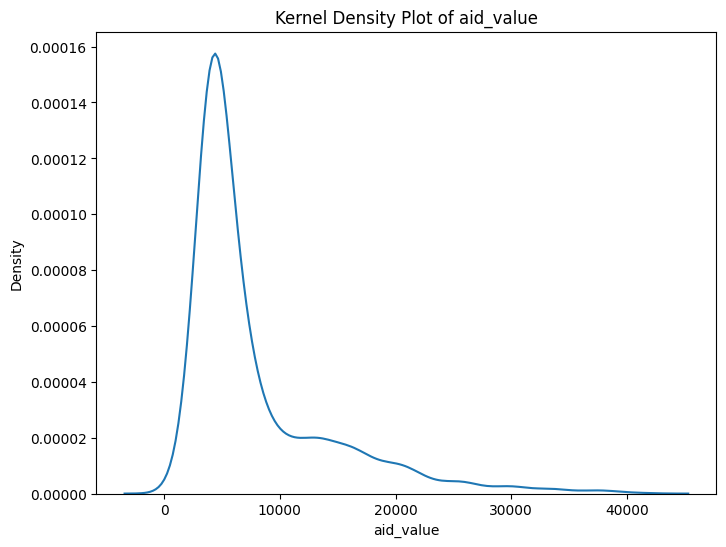

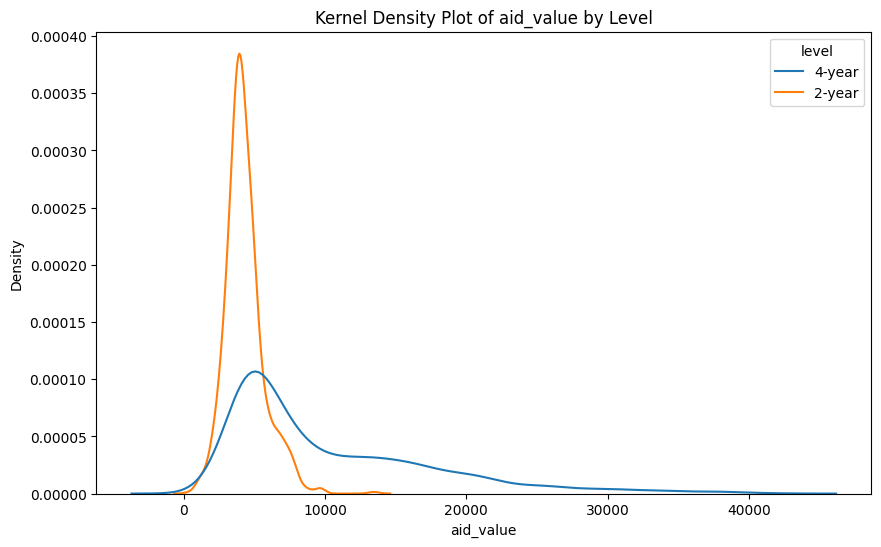

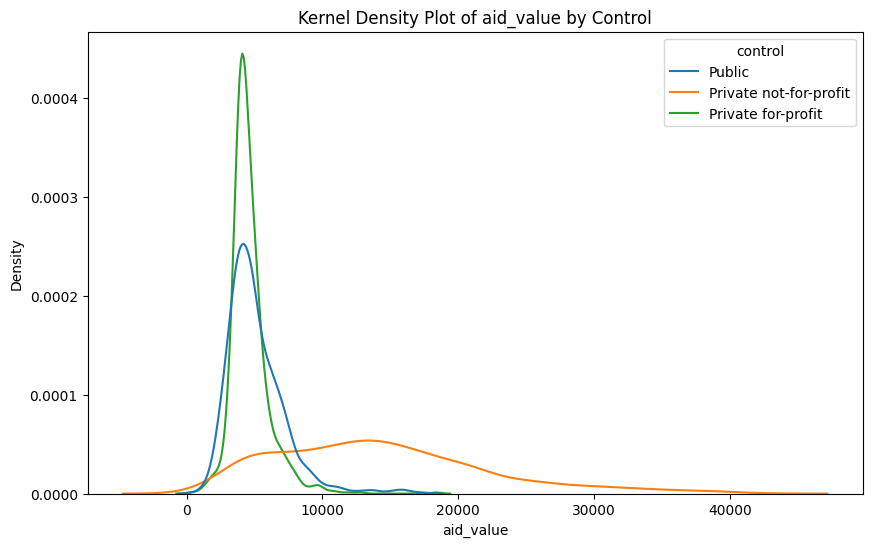

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

In [8]:
# Kernel Density Plot of aid_value
plt.figure(figsize=(8, 6))
sns.kdeplot(df['aid_value'])
plt.title('Kernel Density Plot of aid_value')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.show()

# Grouped Kernel Density Plot by level
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='aid_value', hue='level', common_norm=False)
plt.title('Kernel Density Plot of aid_value by Level')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.show()

# Grouped Kernel Density Plot by control
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='aid_value', hue='control', common_norm=False)
plt.title('Kernel Density Plot of aid_value by Control')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.show()

# Grouped statistical descriptions
grouped_stats_aid = df.groupby(['level', 'control'])['aid_value'].describe()
grouped_stats_aid


Based on these kernel density plots, we can deduce that 2-year institutions give aid much more often, while 4-years give larger amounts. We can see that private for-profit give aid the most often and private not-for-profit gives the larger amounts.

Part 8

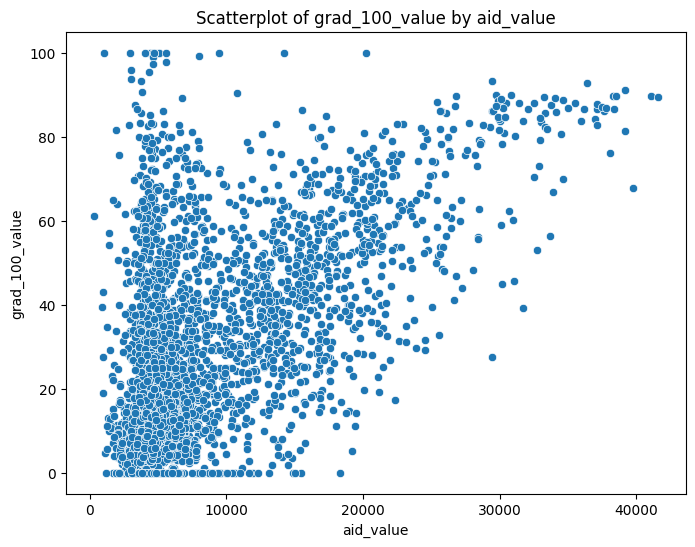

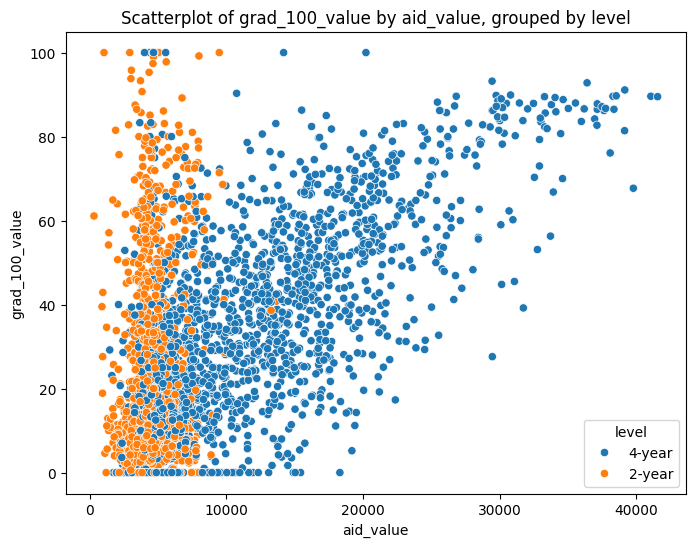

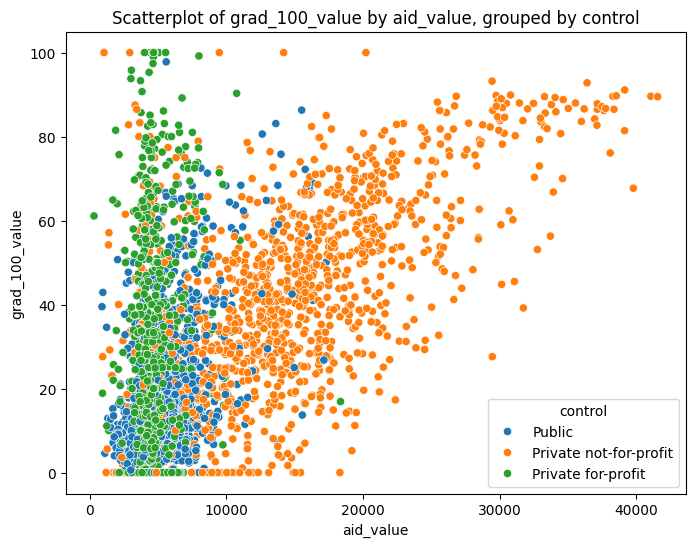

In [9]:
# Scatterplot of grad_100_value by aid_value
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value')
plt.title('Scatterplot of grad_100_value by aid_value')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')
plt.show()


# Grouped scatterplot by level
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')
plt.title('Scatterplot of grad_100_value by aid_value, grouped by level')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')
plt.show()

# Grouped scatterplot by control
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')
plt.title('Scatterplot of grad_100_value by aid_value, grouped by control')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')
plt.show()



Originally, the distribution shows to show both a positive linear relationship as well as a vertical linear relationship. The schools where increased aid shows increased graduation rates is in 4-year private not-for-profit institutions.

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see?

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.